In [41]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'

data_csv = pd.read_csv(csv_file_path)

data_csv.head()

C:\Users\iliss\AppData\Local\Temp\ipykernel_12916\2579853941.py:7: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv(csv_file_path)


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_drop = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 
                   'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']

data_csv = data_csv.drop(columns=columns_to_drop)


In [4]:
data_csv.head()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50


In [5]:
data_csv.columns = [c.replace(' ', '_') for c in data_csv.columns]

In [6]:
data_csv.head()

,Child_ID,Gender,Date_of_Birth,Location_-_Sub_Level_1,Program_Label,Adaptive_Sum_of_Scaled_Scores,Adaptive_Developmental_Quotient,Adaptive_Percentile_Rank,Adaptive_95%_Confidence_Interval,Adaptive_RDI,...,Cognitive-Perception_and_Concepts_RS,Cognitive-Perception_and_Concepts_SS,Cognitive-Perception_and_Concepts_PR,Cognitive-Perception_and_Concepts_AE,Cognitive-Perception_and_Concepts_RDI,Cognitive-Perception_and_Concepts_CSS,Cognitive-Perception_and_Concepts_CSS_90%,Cognitive-Perception_and_Concepts_Z-Score,Cognitive-Perception_and_Concepts_T-Score,Cognitive-Perception_and_Concepts_NCE
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50


In [7]:
# 1. In which domains (and sub-domains) are children performing highest and lowest?

In [10]:
data_csv.columns.values.tolist()

['Child_ID',
 'Gender',
 'Date_of_Birth',
 'Location_-_Sub_Level_1',
 'Program_Label',
 'Adaptive_Sum_of_Scaled_Scores',
 'Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',

In [26]:
adaptive_domain = data_csv[[
    'Adaptive_Sum_of_Scaled_Scores','Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',
 'Motor_NCE',
 'Cognitive_Sum_of_Scaled_Scores',
 'Cognitive_Developmental_Quotient',
 'Cognitive_Percentile_Rank',
 'Cognitive_95%_Confidence_Interval',
 'Cognitive_RDI',
 'Cognitive_Z-Score',
 'Cognitive_T-Score',
 'Cognitive_NCE',
 'BDI-3_Total_Sum_of_Scaled_Scores',
 'BDI-3_Total_Developmental_Quotient',
 'BDI-3_Total_Percentile_Rank',
 'BDI-3_Total_90%_Confidence_Interval',
 'BDI-3_Total_95%_Confidence_Interval',
 'BDI-3_Total_Z-Score',
 'BDI-3_Total_T-Score',
 'BDI-3_Total_NCE',
 'Adaptive-Self_Care_Examiner',
 'Adaptive-Self_Care_Date_of_Testing',
 'Adaptive-Self_Care_RS',
 'Adaptive-Self_Care_SS',
 'Adaptive-Self_Care_PR',
 'Adaptive-Self_Care_AE',
 'Adaptive-Self_Care_RDI',
 'Adaptive-Self_Care_CSS',
 'Adaptive-Self_Care_CSS_90%',
 'Adaptive-Self_Care_Z-Score',
 'Adaptive-Self_Care_T-Score',
 'Adaptive-Self_Care_NCE',
 'Adaptive-Personal_Responsibility_Examiner',
 'Adaptive-Personal_Responsibility_Date_of_Testing',
 'Adaptive-Personal_Responsibility_RS',
 'Adaptive-Personal_Responsibility_SS',
 'Adaptive-Personal_Responsibility_PR',
 'Adaptive-Personal_Responsibility_AE',
 'Adaptive-Personal_Responsibility_RDI',
 'Adaptive-Personal_Responsibility_CSS',
 'Adaptive-Personal_Responsibility_CSS_90%',
 'Adaptive-Personal_Responsibility_Z-Score',
 'Adaptive-Personal_Responsibility_T-Score',
 'Adaptive-Personal_Responsibility_NCE',
 'Social_Emotional-Adult_Interaction_Examiner',
 'Social_Emotional-Adult_Interaction_Date_of_Testing',
 'Social_Emotional-Adult_Interaction_RS',
 'Social_Emotional-Adult_Interaction_SS',
 'Social_Emotional-Adult_Interaction_PR',
 'Social_Emotional-Adult_Interaction_AE',
 'Social_Emotional-Adult_Interaction_RDI',
 'Social_Emotional-Adult_Interaction_CSS',
 'Social_Emotional-Adult_Interaction_CSS_90%',
 'Social_Emotional-Adult_Interaction_Z-Score',
 'Social_Emotional-Adult_Interaction_T-Score',
 'Social_Emotional-Adult_Interaction_NCE',
 'Social_Emotional-Peer_Interaction_Examiner',
 'Social_Emotional-Peer_Interaction_Date_of_Testing',
 'Social_Emotional-Peer_Interaction_RS',
 'Social_Emotional-Peer_Interaction_SS',
 'Social_Emotional-Peer_Interaction_PR',
 'Social_Emotional-Peer_Interaction_AE',
 'Social_Emotional-Peer_Interaction_RDI',
 'Social_Emotional-Peer_Interaction_CSS',
 'Social_Emotional-Peer_Interaction_CSS_90%',
 'Social_Emotional-Peer_Interaction_Z-Score',
 'Social_Emotional-Peer_Interaction_T-Score',
 'Social_Emotional-Peer_Interaction_NCE',
 'Social_Emotional-Self_Concept_/_Social_Role_Examiner',
 'Social_Emotional-Self_Concept_/_Social_Role_Date_of_Testing',
 'Social_Emotional-Self_Concept_/_Social_Role_RS',
 'Social_Emotional-Self_Concept_/_Social_Role_SS',
 'Social_Emotional-Self_Concept_/_Social_Role_PR',
 'Social_Emotional-Self_Concept_/_Social_Role_AE',
 'Social_Emotional-Self_Concept_/_Social_Role_RDI',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS_90%',
 'Social_Emotional-Self_Concept_/_Social_Role_Z-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_T-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_NCE',
 'Communication-Receptive_Communication_Examiner',
 'Communication-Receptive_Communication_Date_of_Testing',
 'Communication-Receptive_Communication_RS',
 'Communication-Receptive_Communication_SS',
 'Communication-Receptive_Communication_PR',
 'Communication-Receptive_Communication_AE',
 'Communication-Receptive_Communication_RDI',
 'Communication-Receptive_Communication_CSS',
 'Communication-Receptive_Communication_CSS_90%_',
 'Communication-Receptive_Communication_Z-Score',
 'Communication-Receptive_Communication_T-Score',
 'Communication-Receptive_Communication_NCE',
 'Communication-Expressive_Communication_Examiner',
 'Communication-Expressive_Communication_Date_of_Testing',
 'Communication-Expressive_Communication_RS',
 'Communication-Expressive_Communication_SS',
 'Communication-Expressive_Communication_PR',
 'Communication-Expressive_Communication_AE',
 'Communication-Expressive_Communication_RDI',
 'Communication-Expressive_Communication_CSS',
 'Communication-Expressive_Communication_CSS_90%_',
 'Communication-Expressive_Communication_Z-Score',
 'Communication-Expressive_Communication_T-Score',
 'Communication-Expressive_Communication_NCE',
 'Motor-Gross_Motor_Examiner',
 'Motor-Gross_Motor_Date_of_Testing',
 'Motor-Gross_Motor_RS',
 'Motor-Gross_Motor_SS',
 'Motor-Gross_Motor_PR',
 'Motor-Gross_Motor_AE',
 'Motor-Gross_Motor_RDI',
 'Motor-Gross_Motor_CSS',
 'Motor-Gross_Motor_CSS_90%_',
 'Motor-Gross_Motor_Z-Score',
 'Motor-Gross_Motor_T-Score',
 'Motor-Gross_Motor_NCE',
 'Motor-Fine_Motor_Examiner',
 'Motor-Fine_Motor_Date_of_Testing',
 'Motor-Fine_Motor_RS',
 'Motor-Fine_Motor_SS',
 'Motor-Fine_Motor_PR',
 'Motor-Fine_Motor_AE',
 'Motor-Fine_Motor_RDI',
 'Motor-Fine_Motor_CSS',
 'Motor-Fine_Motor_CSS_90%',
 'Motor-Fine_Motor_Z-Score',
 'Motor-Fine_Motor_T-Score',
 'Motor-Fine_Motor_NCE',
 'Motor-Perceptual_Motor_Examiner',
 'Motor-Perceptual_Motor_Date_of_Testing',
 'Motor-Perceptual_Motor_RS',
 'Motor-Perceptual_Motor_SS',
 'Motor-Perceptual_Motor_PR',
 'Motor-Perceptual_Motor_AE',
 'Motor-Perceptual_Motor_RDI',
 'Motor-Perceptual_Motor_CSS',
 'Motor-Perceptual_Motor_CSS_90%_',
 'Motor-Perceptual_Motor_Z-Score',
 'Motor-Perceptual_Motor_T-Score',
 'Motor-Perceptual_Motor_NCE',
 'Cognitive-Attention_and_Memory_Examiner',
 'Cognitive-Attention_and_Memory_Date_of_Testing',
 'Cognitive-Attention_and_Memory_RS',
 'Cognitive-Attention_and_Memory_SS',
 'Cognitive-Attention_and_Memory_PR',
 'Cognitive-Attention_and_Memory_AE',
 'Cognitive-Attention_and_Memory_RDI',
 'Cognitive-Attention_and_Memory_CSS',
 'Cognitive-Attention_and_Memory_CSS_90%',
 'Cognitive-Attention_and_Memory_Z-Score',
 'Cognitive-Attention_and_Memory_T-Score',
 'Cognitive-Attention_and_Memory_NCE',
 'Cognitive-Reasoning_/_Academic_Skills_Examiner',
 'Cognitive-Reasoning_/_Academic_Skills_Date_of_Testing',
 'Cognitive-Reasoning_/_Academic_Skills_RS',
 'Cognitive-Reasoning_/_Academic_Skills_SS',
 'Cognitive-Reasoning_/_Academic_Skills_PR',
 'Cognitive-Reasoning_/_Academic_Skills_AE',
 'Cognitive-Reasoning_/_Academic_Skills_RDI',
 'Cognitive-Reasoning_/_Academic_Skills_CSS',
 'Cognitive-Reasoning_/_Academic_Skills_CSS_90%',
 'Cognitive-Reasoning_/_Academic_Skills_Z-Score',
 'Cognitive-Reasoning_/_Academic_Skills_T-Score',
 'Cognitive-Reasoning_/_Academic_Skills_NCE',
 'Cognitive-Perception_and_Concepts_Examiner',
 'Cognitive-Perception_and_Concepts_Date_of_Testing',
 'Cognitive-Perception_and_Concepts_RS',
 'Cognitive-Perception_and_Concepts_SS',
 'Cognitive-Perception_and_Concepts_PR',
 'Cognitive-Perception_and_Concepts_AE',
 'Cognitive-Perception_and_Concepts_RDI',
 'Cognitive-Perception_and_Concepts_CSS',
 'Cognitive-Perception_and_Concepts_CSS_90%',
 'Cognitive-Perception_and_Concepts_Z-Score',
 'Cognitive-Perception_and_Concepts_T-Score',
 'Cognitive-Perception_and_Concepts_NCE']]






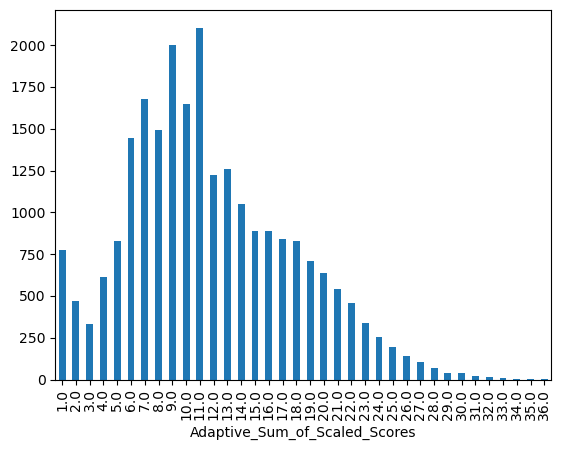

In [30]:
adaptive_domain['Adaptive_Sum_of_Scaled_Scores'].value_counts(dropna = True).sort_index().plot(kind = 'bar');

In [28]:
print(adaptive_domain.columns)


Index(['Adaptive_Sum_of_Scaled_Scores', 'Adaptive_Developmental_Quotient',
       'Adaptive_Percentile_Rank', 'Adaptive_95%_Confidence_Interval',
       'Adaptive_RDI', 'Adaptive_Z-Score', 'Adaptive_T-Score', 'Adaptive_NCE',
       'Social-Emotional_Sum_of_Scaled_Scores',
       'Social-Emotional_Developmental_Quotient',
       ...
       'Cognitive-Perception_and_Concepts_RS',
       'Cognitive-Perception_and_Concepts_SS',
       'Cognitive-Perception_and_Concepts_PR',
       'Cognitive-Perception_and_Concepts_AE',
       'Cognitive-Perception_and_Concepts_RDI',
       'Cognitive-Perception_and_Concepts_CSS',
       'Cognitive-Perception_and_Concepts_CSS_90%',
       'Cognitive-Perception_and_Concepts_Z-Score',
       'Cognitive-Perception_and_Concepts_T-Score',
       'Cognitive-Perception_and_Concepts_NCE'],
      dtype='object', length=204)


In [31]:
adaptive_domain.to_csv('../data/adaptive_domain.csv')

In [40]:
csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
df = pd.read_csv(csv_file_path)

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# Remove columns with non-numeric values from the DataFrame
df = df.drop(columns=non_numeric_columns)

# Calculate the mean for each column
column_means = df.mean()

print(column_means)

Adaptive Sum of Scaled Scores              11.728268
Adaptive Developmental Quotient            86.988304
Adaptive T-Score                           41.326204
Social-Emotional Sum of Scaled Scores      22.773770
Social-Emotional Developmental Quotient    94.293601
                                             ...    
Code 6                                           NaN
Code 7                                           NaN
Code 8                                           NaN
Code 9                                           NaN
Code 10                                          NaN
Length: 79, dtype: float64


C:\Users\iliss\AppData\Local\Temp\ipykernel_12916\1184115229.py:2: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


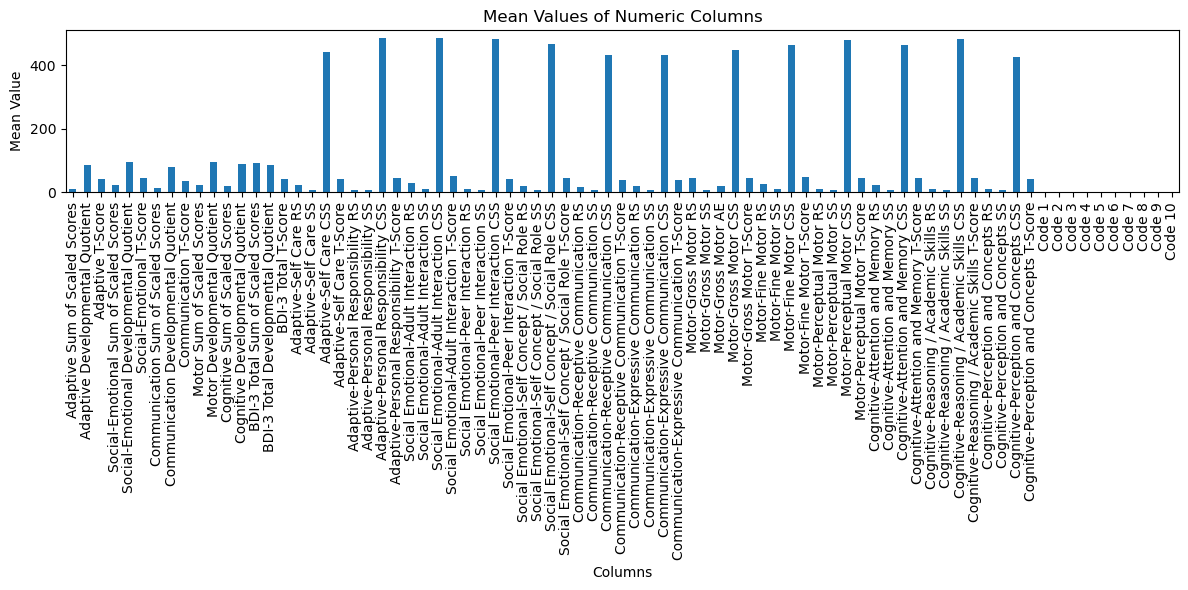

In [44]:
plt.figure(figsize=(12, 6))
column_means.plot(kind='bar')
plt.title('Mean Values of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

C:\Users\iliss\AppData\Local\Temp\ipykernel_12916\3996632005.py:1: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


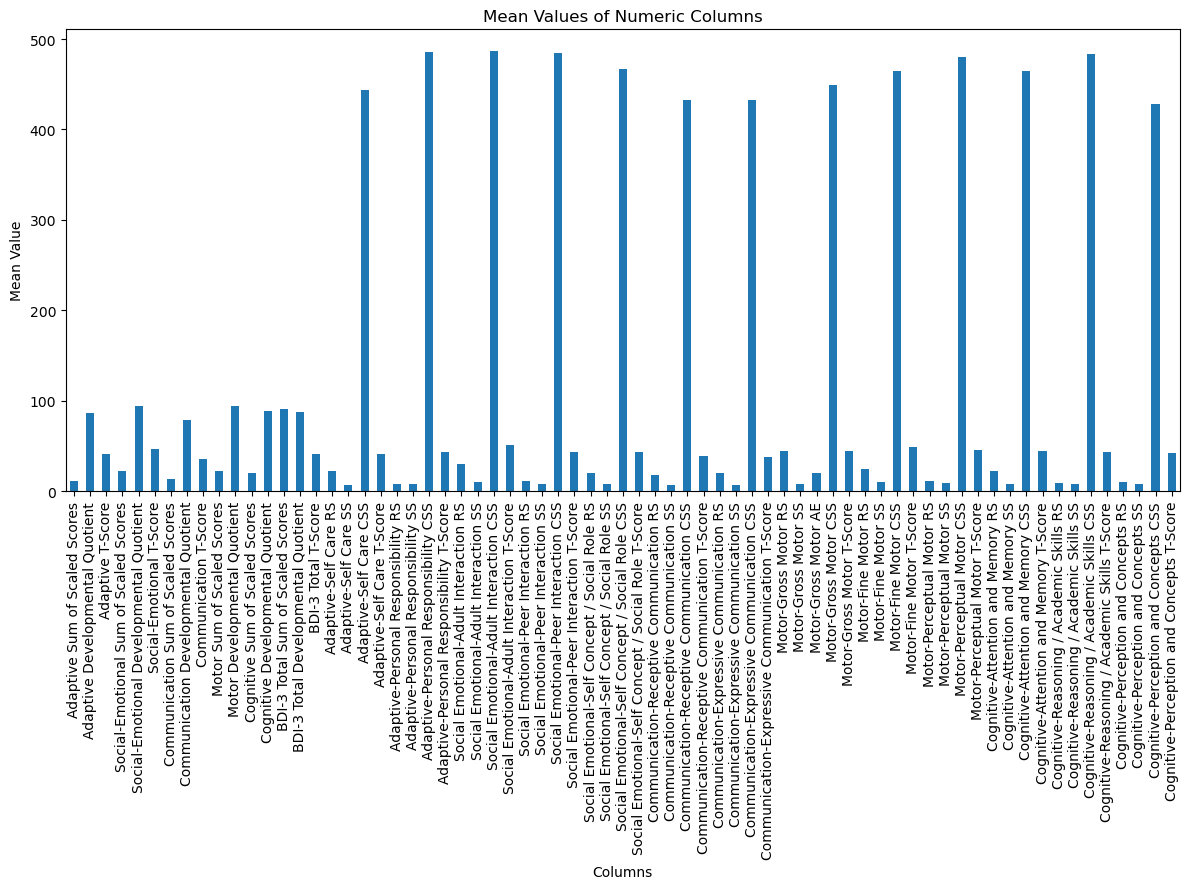

In [64]:
df = pd.read_csv(csv_file_path)

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df = df.drop(columns=non_numeric_columns)
columns_to_remove = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5',
                     'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']

# Drop the columns
df = df.drop(columns=columns_to_remove)

column_means = df.mean()

plt.figure(figsize=(12, 9))
column_means.plot(kind='bar')
plt.title('Mean Values of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.tight_layout()

plt.show()

In [53]:
grouped_columns = df.columns.to_series().groupby(df.columns.str.split('_').str[0], axis=0)


In [54]:
averages_df = pd.DataFrame()


In [58]:
adaptive_df = pd.DataFrame()
social_df = pd.DataFrame()
communication_df = pd.DataFrame()
motor_df = pd.DataFrame()
cognitive_df = pd.DataFrame()

In [59]:
for column in df.columns:
    if column.startswith('Adaptive'):
        adaptive_df[column] = df[column]
    elif column.startswith('Social'):
        social_df[column] = df[column]
    elif column.startswith('Communication'):
        communication_df[column] = df[column]
    elif column.startswith('Motor'):
        motor_df[column] = df[column]
    elif column.startswith('Cognitive'):
        cognitive_df[column] = df[column]

In [60]:
adaptive_average = adaptive_df.mean(axis=1)
social_average = social_df.mean(axis=1)
communication_average = communication_df.mean(axis=1)
motor_average = motor_df.mean(axis=1)
cognitive_average = cognitive_df.mean(axis=1)

In [61]:
grouped_averages_df = pd.DataFrame({
    'Adaptive_Average': adaptive_average,
    'Social_Average': social_average,
    'Communication_Average': communication_average,
    'Motor_Average': motor_average,
    'Cognitive_Average': cognitive_average
})

In [62]:
print(grouped_averages_df)


       Adaptive_Average  Social_Average  Communication_Average  Motor_Average  \
0             80.571429      124.363636              97.090909      94.272727   
1            112.454545      129.533333             115.363636     124.600000   
2             97.428571      115.272727             104.000000     120.636364   
3            104.000000      115.545455              98.454545      99.727273   
4             82.142857      101.636364              91.818182      94.909091   
...                 ...             ...                    ...            ...   
23942         84.285714      110.000000              98.363636      91.909091   
23943        126.909091      136.266667             126.272727     135.533333   
23944        119.818182      128.133333              90.454545     126.133333   
23945        117.636364      125.600000             113.818182     134.533333   
23946         76.857143       99.727273              93.181818      84.545455   

       Cognitive_Average  


In [65]:
domain_columns = ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive']

In [66]:
averages_df = pd.DataFrame(columns=['Domain', 'Average'])

In [71]:
columns_in_domain = [col for col in df.columns if col.startswith(domain)]
domain_average = df[columns_in_domain].mean(axis=1)
averages_df = pd.concat([averages_df, pd.DataFrame({'Domain': domain, 'Average': [domain_average.mean()]})], ignore_index=True)

In [72]:
averages_df = averages_df.sort_values(by='Average', ascending=False)

print(averages_df)

             Domain     Average
4         Cognitive  116.634037
5         Cognitive  116.634037
6         Cognitive  116.634037
3             Motor  114.532991
2     Communication  101.892682
0          Adaptive  101.025754
1  Social-Emotional   54.421616


In [75]:
data = {'Domain': ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive'],
        'Average': [10, 15, 8, 12, 20]}

In [76]:
averages_df = pd.DataFrame(data)

In [77]:
averages_df = averages_df.sort_values(by='Average', ascending=False)

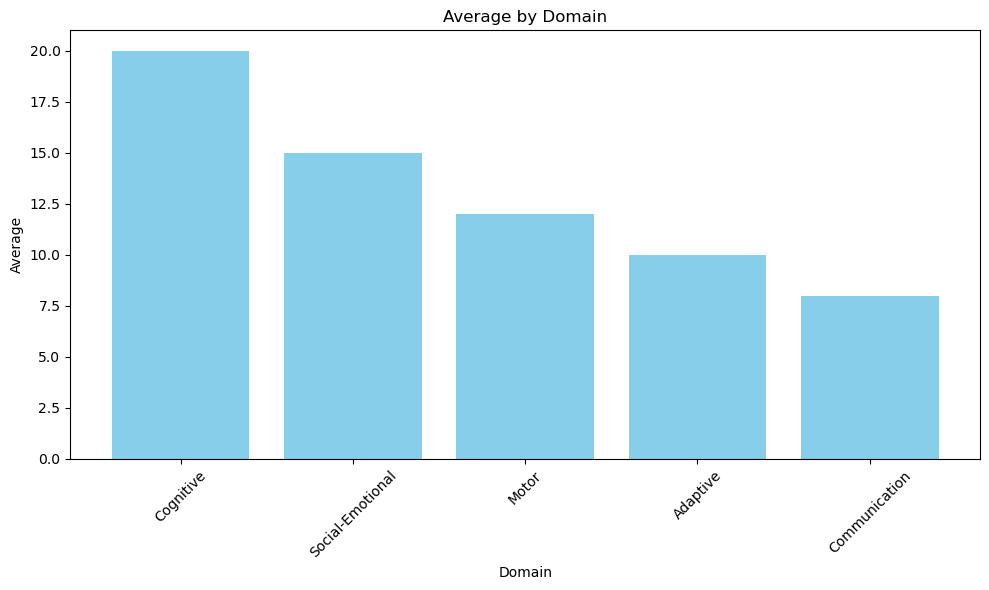

In [78]:
plt.figure(figsize=(10, 6))
plt.bar(averages_df['Domain'], averages_df['Average'], color='skyblue')
plt.xlabel('Domain')
plt.ylabel('Average')
plt.title('Average by Domain')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()